In [2]:
import pandas as pd

/var/folders/dk/y0lym97s13g52x50m8y8qycc0000gn/T/ipykernel_29617/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df= pd.read_csv('../data/processed/train_processed_no_outliers_z.csv')

In [4]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.0,138875.0,138875.000000,138875.000000,...,138875.000000,138875.000000,138875.000000,138875.000000,138875.00000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000
mean,43.633289,165.406121,66.941825,82.667135,1.007888,1.003472,1.0,1.0,122.037941,76.651003,...,55.892536,114.872418,14.823623,1.037501,0.89152,24.792698,25.420731,33.171190,0.198949,0.434326
std,11.412699,8.758014,12.108342,8.678588,0.307364,0.306957,0.0,0.0,12.423009,8.822003,...,13.689859,25.696337,1.344639,0.189988,0.17229,7.114513,12.572411,20.962736,0.399211,0.495670
min,20.000000,139.000000,30.000000,56.200000,0.100000,0.100000,1.0,1.0,85.000000,50.000000,...,22.000000,32.000000,10.600000,1.000000,0.40000,7.000000,1.000000,3.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.0,1.0,113.000000,70.000000,...,46.000000,95.000000,13.800000,1.000000,0.80000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.0,1.0,120.000000,78.000000,...,54.000000,115.000000,15.000000,1.000000,0.90000,23.000000,22.000000,27.000000,0.000000,0.000000
75%,50.000000,170.000000,75.000000,88.800000,1.200000,1.200000,1.0,1.0,130.000000,82.000000,...,64.000000,134.000000,15.800000,1.000000,1.00000,29.000000,31.000000,42.000000,0.000000,1.000000
max,75.000000,190.000000,101.000000,109.800000,2.000000,2.000000,1.0,1.0,160.000000,103.000000,...,97.000000,199.000000,19.000000,2.000000,1.40000,53.000000,79.000000,129.000000,1.000000,1.000000


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = df.drop('smoking', axis=1)
y = df['smoking']

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)

model = SelectFromModel(forest, prefit=True)
X_new = model.transform(X)

selected_features = X.columns[model.get_support()]
selected_features

/Users/hectormoya/Documents/Bootcamp Data Science/Proyecto ML/.venv/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['height(cm)', 'weight(kg)', 'waist(cm)', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'ALT', 'Gtp'],
      dtype='object')

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

selector = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=1)
selector = selector.fit(X, y)

X_new = selector.transform(X)

selected_features = X.columns[selector.support_]
selected_features

/Users/hectormoya/Documents/Bootcamp Data Science/Proyecto ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hectormoya/Documents/Bootcamp Data Science/Proyecto ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

Index(['weight(kg)', 'waist(cm)', 'hemoglobin', 'serum creatinine',
       'dental caries'],
      dtype='object')

In [7]:
caracteristicas_seleccionadas = [
    'height(cm)', 'weight(kg)', 'waist(cm)', 'Cholesterol', 'triglyceride',
    'HDL', 'LDL', 'hemoglobin', 'ALT', 'Gtp', 'serum creatinine', 'dental caries'
]
caracteristicas_seleccionadas.append('smoking')
df_reducido = df[caracteristicas_seleccionadas]

df_reducido.head()

,height(cm),weight(kg),waist(cm),Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp,serum creatinine,dental caries,smoking
0,165,60,81.0,172,300,40,75,16.5,25,27,1.0,0,1
1,170,75,81.0,178,197,45,93,17.4,31,53,0.8,0,1
2,180,95,105.0,180,203,38,102,15.9,27,30,1.0,1,0
3,165,60,80.5,155,87,44,93,15.4,13,17,0.8,0,1
4,160,55,69.0,222,153,69,122,13.0,12,16,0.7,0,0


In [8]:
df_reducido.describe()

,height(cm),weight(kg),waist(cm),Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT,Gtp,serum creatinine,dental caries,smoking
count,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.000000,138875.00000,138875.000000,138875.000000
mean,165.406121,66.941825,82.667135,195.713116,125.016684,55.892536,114.872418,14.823623,25.420731,33.171190,0.89152,0.198949,0.434326
std,8.758014,12.108342,8.678588,28.024149,61.857166,13.689859,25.696337,1.344639,12.572411,20.962736,0.17229,0.399211,0.495670
min,139.000000,30.000000,56.200000,111.000000,8.000000,22.000000,32.000000,10.600000,1.000000,3.000000,0.40000,0.000000,0.000000
25%,160.000000,60.000000,77.000000,175.000000,76.000000,46.000000,95.000000,13.800000,16.000000,18.000000,0.80000,0.000000,0.000000
50%,165.000000,65.000000,83.000000,197.000000,114.000000,54.000000,115.000000,15.000000,22.000000,27.000000,0.90000,0.000000,0.000000
75%,170.000000,75.000000,88.800000,217.000000,163.000000,64.000000,134.000000,15.800000,31.000000,42.000000,1.00000,0.000000,1.000000
max,190.000000,101.000000,109.800000,280.000000,326.000000,97.000000,199.000000,19.000000,79.000000,129.000000,1.40000,1.000000,1.000000


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_reducido)

VIFs = pd.DataFrame()
VIFs["Variable"] = X.columns
VIFs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFs

,Variable,VIF
0,const,1091.802568
1,height(cm),2.897990
2,weight(kg),6.132654
3,waist(cm),4.019654
4,Cholesterol,95.615345
5,triglyceride,19.318074
6,HDL,24.021983
7,LDL,80.785201
8,hemoglobin,1.974322
9,ALT,1.468846


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

variables_para_pca = ['Cholesterol', 'triglyceride', 'HDL', 'LDL']
X = df_reducido[variables_para_pca]
X_normalized = StandardScaler().fit_transform(X)

pca = PCA(n_components=1)  

X_pca = pca.fit_transform(X_normalized)

df_reducido['Lipid_Component'] = X_pca
df_reducido.drop(variables_para_pca, axis=1, inplace=True)

/var/folders/dk/y0lym97s13g52x50m8y8qycc0000gn/T/ipykernel_29617/3764457192.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido['Lipid_Component'] = X_pca
/var/folders/dk/y0lym97s13g52x50m8y8qycc0000gn/T/ipykernel_29617/3764457192.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido.drop(variables_para_pca, axis=1, inplace=True)


In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_reducido)

VIFs = pd.DataFrame()
VIFs["Variable"] = X.columns
VIFs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFs

,Variable,VIF
0,const,926.206011
1,height(cm),2.897623
2,weight(kg),6.120147
3,waist(cm),3.909393
4,hemoglobin,1.957920
5,ALT,1.460348
6,Gtp,1.470127
7,serum creatinine,1.448193
8,dental caries,1.017971
9,smoking,1.428307


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

X = df_reducido.drop('smoking', axis=1)
y = df_reducido['smoking']  

modelo = RandomForestClassifier(random_state=42)

In [13]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

puntuacion = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')

print("Precisión en cada fold:", puntuacion)
print("Precisión media:", puntuacion.mean())
print("Desviación estándar de la precisión:", puntuacion.std())

Precisión en cada fold: [0.74988299 0.74667867 0.74329433 0.74329433 0.7440144 ]
Precisión media: 0.7454329432943295
Desviación estándar de la precisión: 0.002550071753531879


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reducido.drop('smoking', axis=1))
y = df_reducido['smoking']

In [16]:
from sklearn.linear_model import LogisticRegression

modelo_logreg = LogisticRegression(max_iter=1000)
modelo_logreg.fit(X_scaled, y)

puntajes_logreg = cross_val_score(modelo_logreg, X_scaled, y, cv=cv, scoring='accuracy')
puntajes_logreg

array([0.72820882, 0.73051305, 0.72968497, 0.72349235, 0.72781278])

In [17]:
from sklearn.svm import SVC

modelo_svc = SVC(kernel='linear')
modelo_svc.fit(X_scaled, y)

puntajes_svc = cross_val_score(modelo_svc, X_scaled, y, cv=cv, scoring='accuracy')
puntajes_svc

array([0.74059406, 0.73882988, 0.73774977, 0.73317732, 0.73368137])

In [18]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_scaled, y)

puntajes_knn = cross_val_score(modelo_knn, X_scaled, y, cv=cv, scoring='accuracy')
puntajes_knn

array([0.71819982, 0.71920792, 0.71582358, 0.7139874 , 0.71492349])

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gbc = GradientBoostingClassifier(random_state=42)
modelo_gbc.fit(X_scaled, y)

puntajes_gbc = cross_val_score(modelo_gbc, X_scaled, y, cv=cv, scoring='accuracy')
puntajes_gbc

array([0.75319532, 0.75643564, 0.7519712 , 0.75063906, 0.7509991 ])

In [32]:
modelo_gbc2 = GradientBoostingClassifier(n_estimators= 5, learning_rate=3, max_depth=5,  random_state=42)

modelo_gbc2.fit(X_scaled, y)


puntajes_gbc2 = cross_val_score(modelo_gbc2, X_scaled, y, cv=cv, scoring='accuracy')
puntajes_gbc2

array([0.57234923, 0.57684968, 0.60694869, 0.62718272, 0.66437444])

Precisión: 0.7531953195319532
Matriz de Confusión:
[[11177  4537]
 [ 2318  9743]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77     15714
           1       0.68      0.81      0.74     12061

    accuracy                           0.75     27775
   macro avg       0.76      0.76      0.75     27775
weighted avg       0.76      0.75      0.75     27775

AUC-ROC: 0.8388112675757298


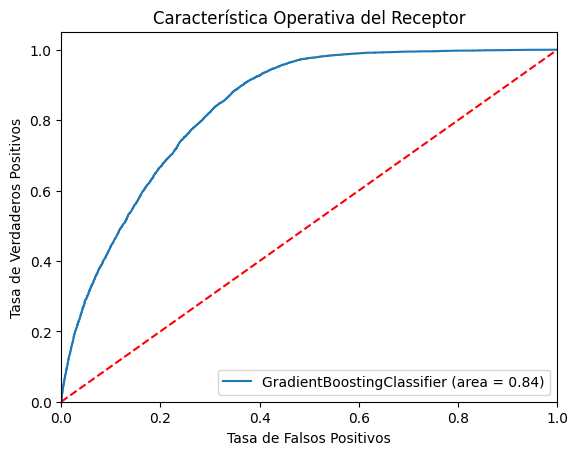

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

modelo_gbc = GradientBoostingClassifier(random_state=42)
modelo_gbc.fit(X_train, y_train)

y_pred = modelo_gbc.predict(X_test)
y_pred_proba = modelo_gbc.predict_proba(X_test)[:, 1]  # Probabilidades para AUC


accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Informe de Clasificación:\n{class_report}')

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {roc_auc}')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='GradientBoostingClassifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor')
plt.legend(loc="lower right")
plt.show()


In [51]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_probs = modelo_gbc.predict_proba(X_test)[:, 1]

umbral = 0.5

y_pred_umbral = np.where(y_probs > umbral, 1, 0)

precision = precision_score(y_test, y_pred_umbral)
recall = recall_score(y_test, y_pred_umbral)
accuracy = accuracy_score(y_test, y_pred_umbral)

print(f'Con un umbral de {umbral}:')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Precisión: {accuracy}')

Con un umbral de 0.5:
Precisión: 0.6822829131652661
Recall: 0.8078102976535942
Precisión: 0.7531953195319532


In [41]:
umbrales = np.arange(0.1, 1, 0.1)
for umbral in umbrales:
    y_pred_umbral = np.where(y_probs > umbral, 1, 0)
    precision = precision_score(y_test, y_pred_umbral)
    recall = recall_score(y_test, y_pred_umbral)
    accuracy = accuracy_score(y_test, y_pred_umbral)
    print(f'Umbral: {umbral:.1f}, Precisión: {precision:.2f}, Recall: {recall:.2f}, Precisión: {accuracy:.2f}')

Umbral: 0.1, Precisión: 0.59, Recall: 0.98, Precisión: 0.69
Umbral: 0.2, Precisión: 0.61, Recall: 0.97, Precisión: 0.72
Umbral: 0.3, Precisión: 0.63, Recall: 0.95, Precisión: 0.73
Umbral: 0.4, Precisión: 0.65, Recall: 0.91, Precisión: 0.75
Umbral: 0.5, Precisión: 0.68, Recall: 0.81, Precisión: 0.75
Umbral: 0.6, Precisión: 0.73, Recall: 0.64, Precisión: 0.74
Umbral: 0.7, Precisión: 0.79, Recall: 0.39, Precisión: 0.69
Umbral: 0.8, Precisión: 0.86, Recall: 0.13, Precisión: 0.61
Umbral: 0.9, Precisión: 0.94, Recall: 0.00, Precisión: 0.57


In [62]:
y_probs = modelo_gbc.predict_proba(X_test)[:, 1]
umbral = 0.49
y_pred_umbral = np.where(y_probs > umbral, 1, 0)

precision = precision_score(y_test, y_pred_umbral)
recall = recall_score(y_test, y_pred_umbral)
accuracy = accuracy_score(y_test, y_pred_umbral)

print(f'Con un umbral de {umbral}:')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Precisión: {accuracy}')

Con un umbral de 0.49:
Precisión: 0.6791895604395605
Recall: 0.8199154298980184
Precisión: 0.7536273627362736


In [63]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
}


In [64]:
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=parametros,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1 
)


In [65]:
grid_search.fit(X_scaled, y)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy', verbose=1)

In [66]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
Mejor puntuación: 0.754988298829883


In [67]:
mejor_modelo = grid_search.best_estimator_
mejor_modelo

GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=42,
                           subsample=0.5)

# Prueba 2 con más hiperparámetros

In [68]:
parametros_2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_2 = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=parametros_2,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1 
)

grid_search_2.fit(X_scaled, y)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy', verbose=1)

In [69]:
print("Mejores parámetros:", grid_search_2.best_params_)
print("Mejor puntuación:", grid_search_2.best_score_)

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.5}
Mejor puntuación: 0.7553843384338434


In [70]:
mejor_modelo_2 = grid_search_2.best_estimator_
mejor_modelo_2

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200,
                           random_state=42, subsample=0.5)

In [76]:
predicciones = mejor_modelo_2.predict(X_test)
exactitud = accuracy_score(y_test, predicciones)
matriz_confusion = confusion_matrix(y_test, predicciones)
informe_clasificacion = classification_report(y_test, predicciones)
roc_auc = roc_auc_score(y_test, mejor_modelo_2.predict_proba(X_test)[:, 1])

print(f'Exactitud: {exactitud}')
print(f'Matriz de Confusión:\n{matriz_confusion}')
print(f'Informe de Clasificación:\n{informe_clasificacion}')
print(f'Puntuación ROC AUC: {roc_auc}')

Exactitud: 0.7717731773177318
Matriz de Confusión:
[[11573  4141]
 [ 2198  9863]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79     15714
           1       0.70      0.82      0.76     12061

    accuracy                           0.77     27775
   macro avg       0.77      0.78      0.77     27775
weighted avg       0.78      0.77      0.77     27775

Puntuación ROC AUC: 0.8582901950509796


In [1]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [74]:
from joblib import dump

dump(mejor_modelo_2, 'mejor_modelo.joblib')

['mejor_modelo.joblib']

In [75]:
from joblib import load

mejor_modelo_2 = load('mejor_modelo.joblib')